<a href="https://colab.research.google.com/github/shriver42/ESAA/blob/%ED%95%84%EC%82%AC-%EA%B3%BC%EC%A0%9C/0311_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[시각화 도구] : Matplotib
 - 파이썬 표준 시각화 도구라고 부를 수 있다
 - 객체 지향 프로그래밍 지원
 - 사용 방법이 쉬우며 그래프 요소를 세세하게 꾸밀 수 있다

[01] 선 그래프
 - 연속하는 데이터 값들을 직선 또는 곡선으로 연결하여 데이터 값 사이의 관계를 나타냄
 -  시계열 데이터와 같이 연속적인 값의 변화와 패턴을 파악하는데 용이함

In [38]:
#라이브러리 불러오기
import pandas as pd
import matplotlib.pyplot as plt

#Excel 데이터를 데이터프레임으로 변환
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_excel('/content/drive/MyDrive/시도별 전출입 인구수.xlsx', header=0)
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,전출지별,전입지별,1970,1971,1972,1973,1974,1975,1976,1977,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,전출지별,전입지별,이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),...,이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명)
1,전국,전국,4046536,4210164,3687938,4860418,5297969,9011440,6773250,7397623,...,8808256,8487275,8226594,8127195,7506691,7411784,7629098,7755286,7378430,7154226
2,NaN,서울특별시,1742813,1671705,1349333,1831858,2050392,3396662,2756510,2893403,...,2025358,1873188,1733015,1721748,1555281,1520090,1573594,1589431,1515602,1472937
3,NaN,부산광역시,448577,389797,362202,482061,680984,805979,724664,785117,...,514502,519310,519334,508043,461042,478451,485710,507031,459015,439073
4,NaN,대구광역시,-,-,-,-,-,-,-,-,...,409938,398626,370817,370563,348642,351873,350213,351424,328228,321182


- fillina( )
-'ffill' 옵션을 사용하면 누락데이터가 들어 있는 행의 바로 앞에 위치한 행의 데이터 값으로 채워진다</br> EX) '전출지별' 열에는 누락 데이터(NaN)이 다수 들어있다</br> method = ffill 을 사용하여 2행의 NaN 값을 1행의  데이터 '전국'으로 대체할 수 있다.

In [39]:
#누락값(NaN)을 앞 데이터로 채움
df = df.fillna(method = 'ffill')

#서울에서 다른 지역으로 이동한 데이터만 추출하여 정리
mask = (df['전출지별']=='서울특별시') & (df['전입지별'] != '서울특별시')
df_seoul = df[mask]
df_seoul = df_seoul.drop(['전출지별'],axis = 1)
df_seoul.rename({'전입지별':'전입지'},axis=1,inplace=True)
df_seoul.set_index('전입지',inplace=True)
df_seoul.head()

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
전입지,,,,,,,,,,,,,,,,,,,,,
전국,1448985,1419016,1210559,1647268,1819660,2937093,2495620,2678007,3028911,2441242,...,2083352,1925452,1848038,1834806,1658928,1620640,1661425,1726687,1655859,1571423
부산광역시,11568,11130,11768,16307,22220,27515,23732,27213,29856,28542,...,17353,17738,17418,18816,16135,16153,17320,17009,15062,14484
대구광역시,-,-,-,-,-,-,-,-,-,-,...,9720,10464,10277,10397,10135,10631,10062,10191,9623,8891
인천광역시,-,-,-,-,-,-,-,-,-,-,...,50493,45392,46082,51641,49640,47424,43212,44915,43745,40485
광주광역시,-,-,-,-,-,-,-,-,-,-,...,10846,11725,11095,10587,10154,9129,9759,9216,8354,7932


In [40]:
# 서울에서 경기도로 이동한 인구 데이터 값만 선택
sr_one = df_seoul.loc['경기도']
sr_one.head()

1970    130149
1971    150313
1972     93333
1973    143234
1974    149045
Name: 경기도, dtype: object

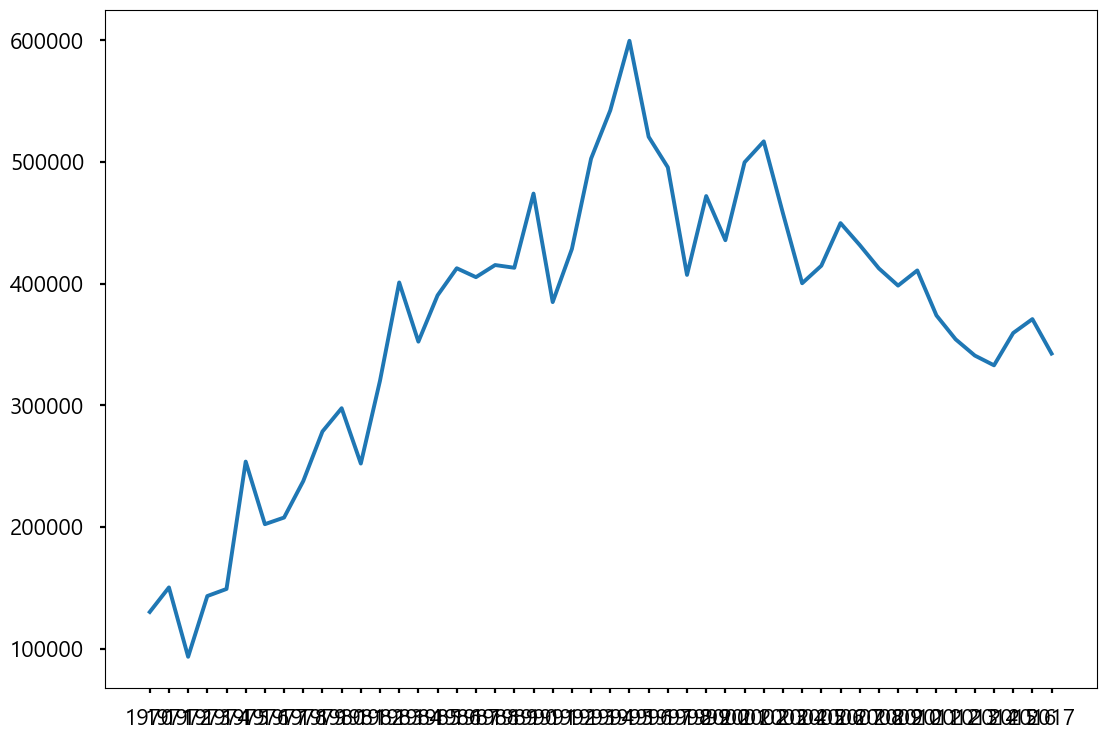

In [41]:
#x,y 축 데이터를 plot 함수에 입력
plt.plot(sr_one.index, sr_one.values)

- Series나 DataFrame 객체를 plot( ) 함수에 직접 입력하는 것도 가능함

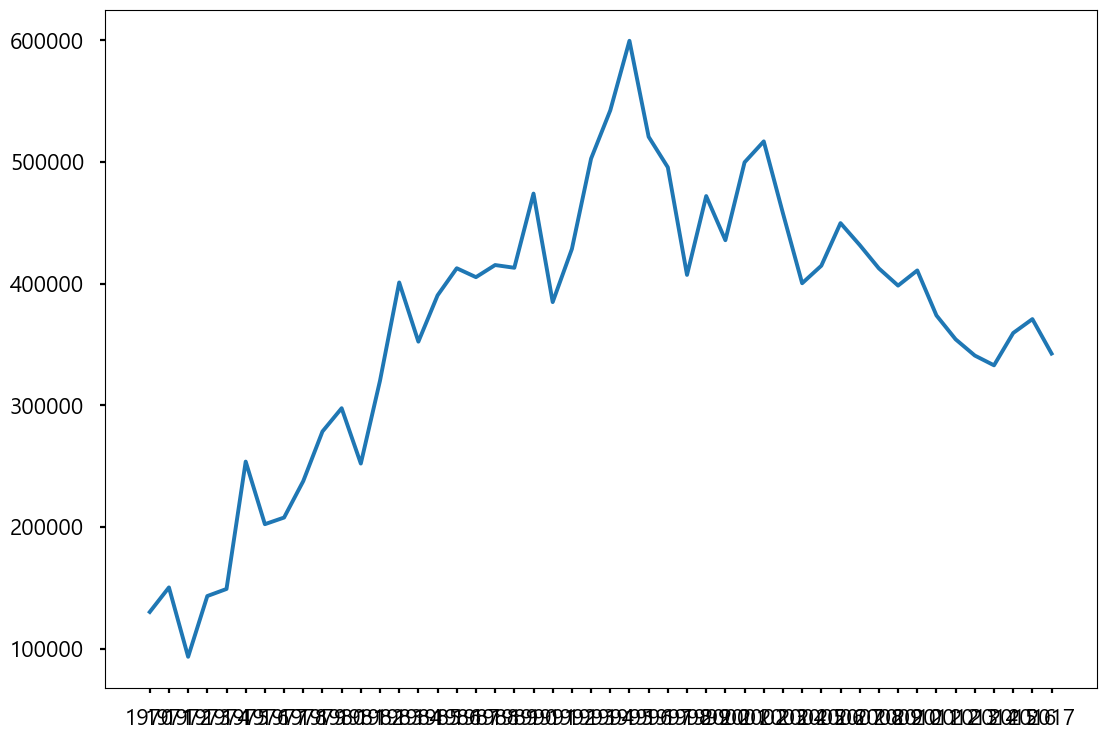

In [42]:
#판다스 객체를 plot 함수에 입력 : 앞의 그래프와 같은 결과가 출력될 것이다
plt.plot(sr_one)

- 차트 제목, 축, 이름 추가
 - title(), xlabel(), ylabel() 이용한다
 - Matplotlib 에서는 한글 폰트 사용시 깨지는 현상이 발생하기에 추가적인 처리가 필요하다

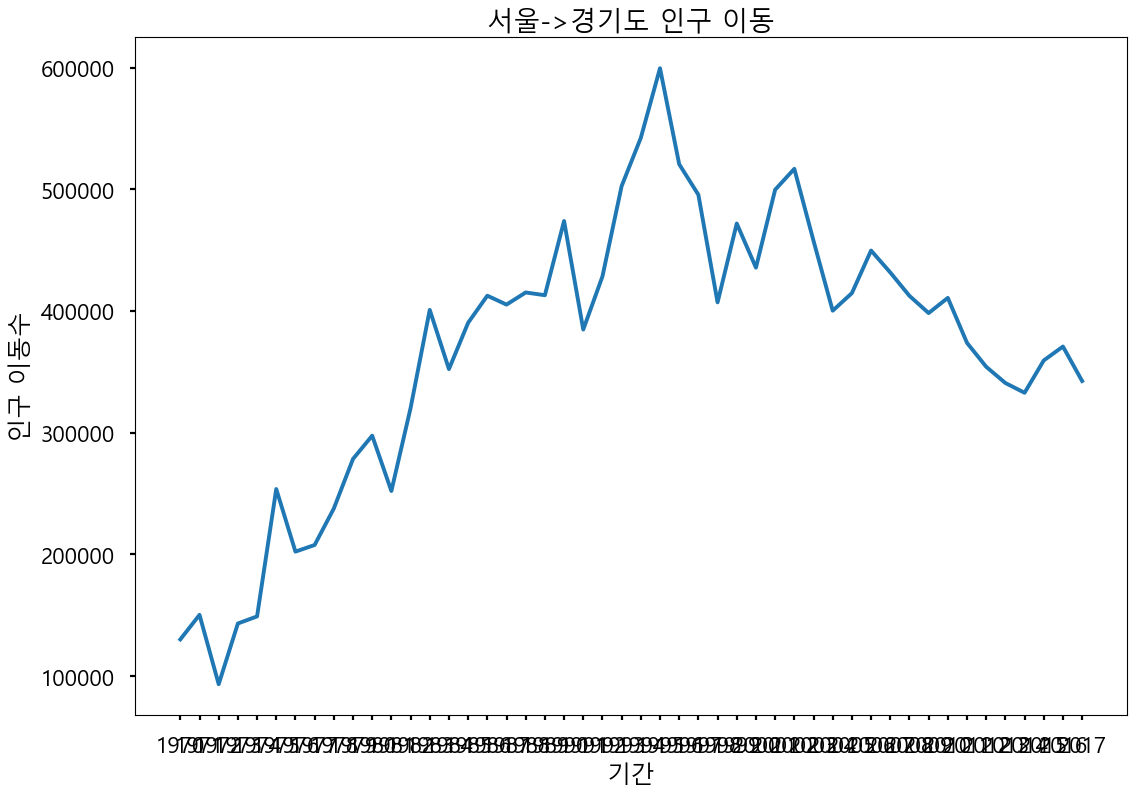

In [43]:
#한글 폰트가 깨지는 경우
#서울에서 경기도로 이동한 인구 데이터 값만 선택
sr_one = df_seoul.loc['경기도']

#x,y 축 데이터를 plot 함수에 입력
plt.plot(sr_one.index,sr_one.values)

#차트 제목 추가
plt.title('서울->경기도 인구 이동')

#축 이름 추가
plt.xlabel('기간')
plt.ylabel('인구 이동수')

plt.show() # 변경사항 저장하고 그래프 출력

In [44]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 38 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

1970    130149
1971    150313
1972     93333
1973    143234
1974    149045
1975    253705
1976    202276
1977    207722
1978    237684
1979    278411
1980    297539
1981    252073
1982    320174
1983    400875
1984    352238
1985    390265
1986    412535
1987    405220
1988    415174
1989    412933
1990    473889
1991    384714
1992    428344
1993    502584
1994    542204
1995    599411
1996    520566
1997    495454
1998    407050
1999    471841
2000    435573
2001    499575
2002    516765
2003    457656
2004    400206
2005    414621
2006    449632
2007    431637
2008    412408
2009    398282
2010    410735
2011    373771
2012    354135
2013    340801
2014    332785
2015    359337
2016    370760
2017    342433
Name: 경기도, dtype: object


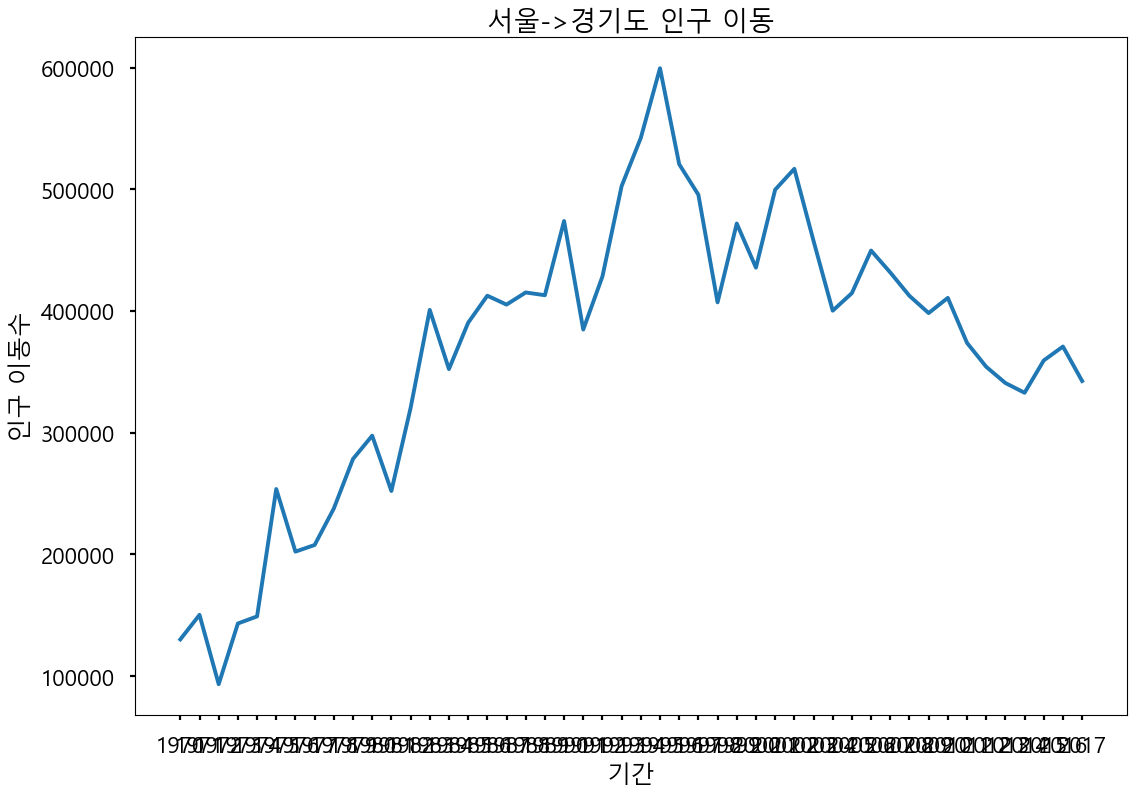

In [45]:
#한글 폰트 오류 문제 해결
# 폰트 설정
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm

# apt-get : 패키지 설치 명령어
# -qq : 에러외의 메세지 숨기는 옵션키
!apt-get -qq install fonts-nanum

fe = fm.FontEntry(
    fname=r'/content/drive/MyDrive/malgun.ttf', # ttf 파일이 저장되어 있는 경로
    name='malgunGothic')                        # 이 폰트의 원하는 이름 설정
fm.fontManager.ttflist.insert(0, fe)              # Matplotlib에 폰트 추가
plt.rcParams.update({'font.size': 18, 'font.family': 'malgunGothic'})



#전체 코드 정리


#Excel 데이터를 데이터프레임으로 변환
df = pd.read_excel('/content/drive/MyDrive/시도별 전출입 인구수.xlsx',header=0)

#전출지별에서 누락값(NaN)을 앞 데이터로 채움(엑셀 양식 병합 부분)
df = df.fillna(method='ffill')

#서울에서 따른 지역으로 이동 가능한 데이터만 추출하여 정리
mask = (df['전출지별']=='서울특별시') & (df['전입지별'] != '서울특별시')
df_seoul = df[mask]
df_seoul = df_seoul.drop(['전출지별'],axis = 1)
df_seoul.rename({'전입지별':'전입지'},axis = 1, inplace=True)
df_seoul.set_index('전입지', inplace=True)

#서울에서 경기도로 이동한 인구 데이터 값만 선택
sr_one = df_seoul.loc['경기도']
print(sr_one)

#x,y축 데이터를 plot 함수에 입력
plt.plot(sr_one.index, sr_one.values)

#차트 제목 추가
plt.title('서울->경기도 인구 이동')

#축 이름 추가
plt.xlabel('기간')
plt.ylabel('인구 이동수')

plt.show()  #변경사항 저장하고 그래프 출력

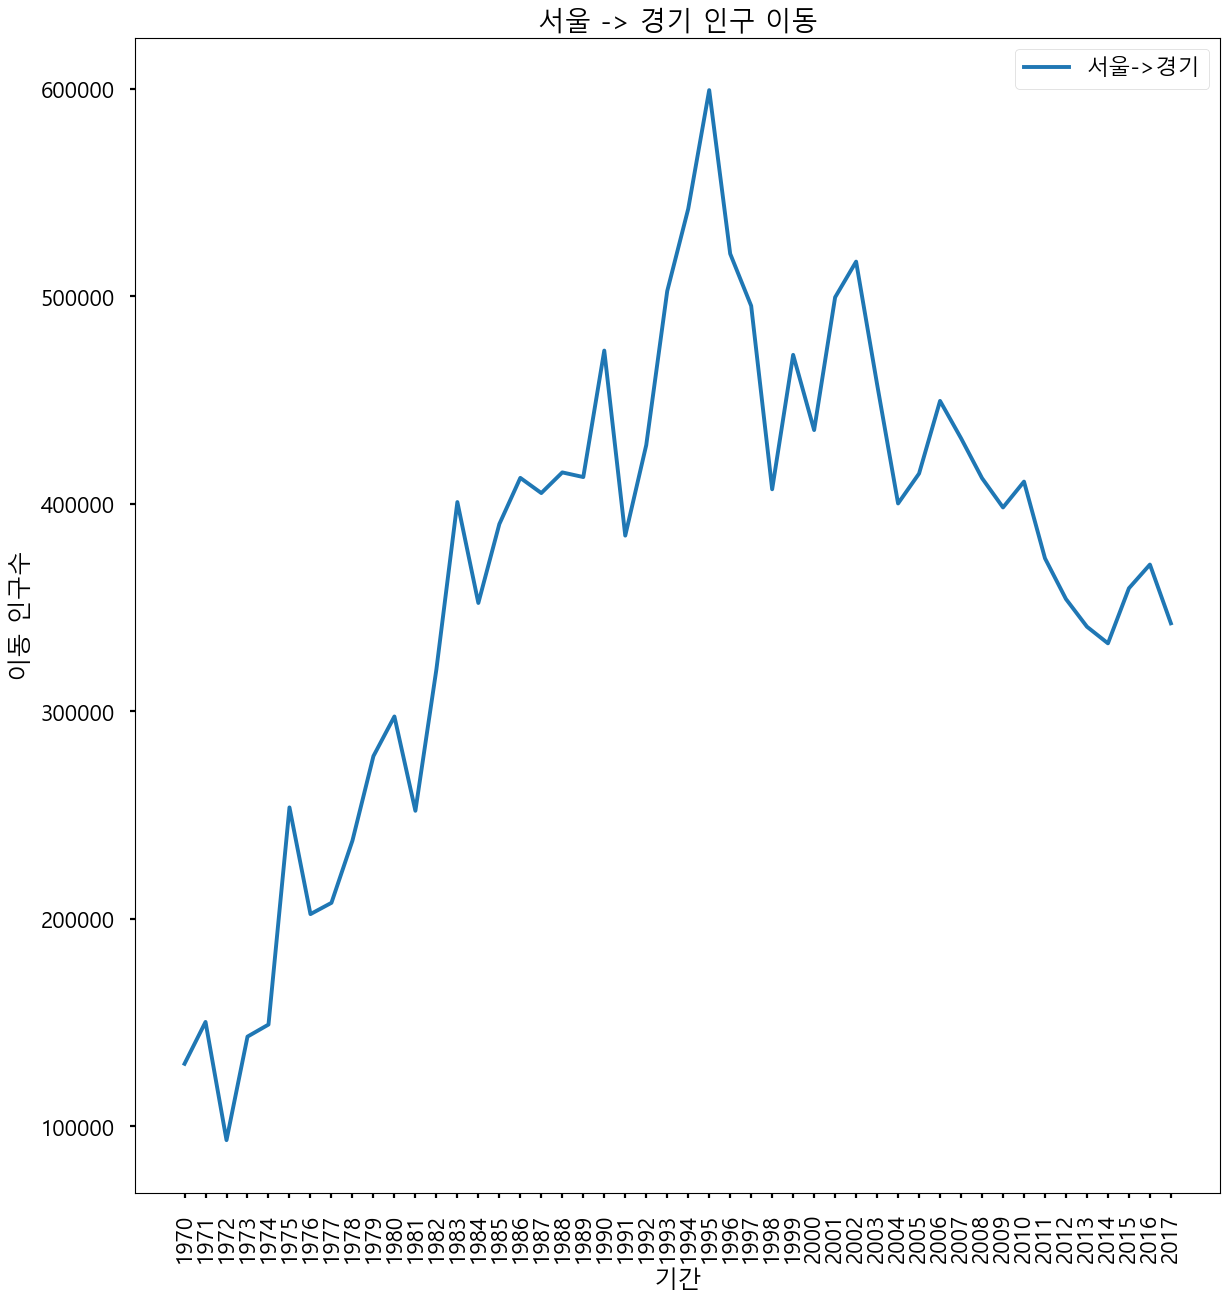

In [46]:
#서울에서 경기도로 이동한 인구 데이터 값만 선택
sr_one = df_seoul.loc['경기도']

#그림 사이즈로 지정(가로14인치 세로15인치)
plt.figure(figsize=(14,15))

#x축 눈금라벨 회전하기
plt.xticks(rotation='vertical')

#x,y축 데이터를 plot 함수에 입력
plt.plot(sr_one.index, sr_one.values)

plt.title('서울 -> 경기 인구 이동') #차트제목
plt.xlabel('기간') #x축 이름
plt.ylabel('이동 인구수') #y축 이름
plt.legend(labels=['서울->경기'], loc='best') #범례표시

plt.show() #변경사항 저장하고 그래프 출력

- 추가적인 스타일
 - x축 라벨을 겹치지 않고 표현은 rotation을 통해 할 수 있다</br> rotation = 'vertical'/ 각도 입력 EX) rotation=90 : 반시계방향으로 90도 회전한다는 의미
 - 스타일 서식을 지정하는 것은 Matplotlib 실행 환꼉 설정을 변경하는 것이다
 - ggplot이라는 스타일 서식 가능</br> : x축 눈금라벨을 정하는 xticks() 함수에 size = n 을 넣어 폰트 크기 설정가능</br> : plot() 함수에 marker = 'o' 넣어 원 모양의점을 마커로 표시 가능</br> : markeersize=n 은 마커 사이즈를 n으로 설정 가능하게 함

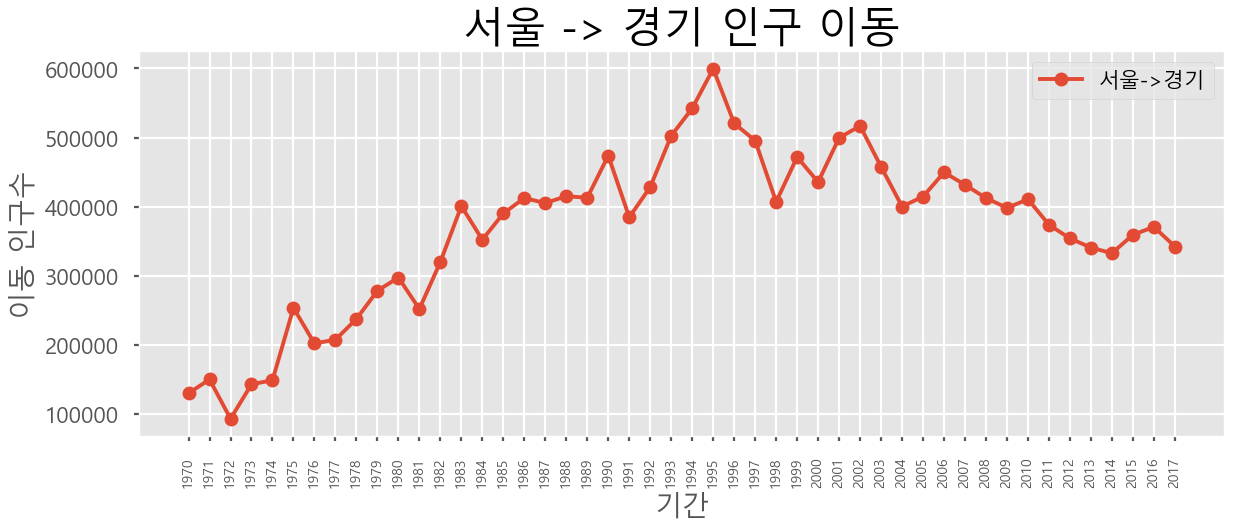

In [47]:
#서울에서 경기도로 이동한 인구 데이터 값만 선택
sr_one = df_seoul.loc['경기도']

#스타일 서식 지정
plt.style.use('ggplot')
#그림사이즈 지정
plt.figure(figsize=(14,5))

#x축 눈금라벨 회전하기
plt.xticks(size=10, rotation='vertical')

#x,y축 데이터를  plot 함수에 입력
plt.plot(sr_one.index, sr_one.values, marker='o', markersize=10) #마커표시 추가

plt.title('서울 -> 경기 인구 이동', size=30) #차트제목
plt.xlabel('기간', size=20) #x축 이름
plt.ylabel('이동 인구수',size=20) #y축 이름
plt.legend(labels=['서울->경기'], loc='best', fontsize=15) #범례표시

plt.show() #변경사항 저장하고 그래프 출력

- Matplotlib 스타일 서식의 종류

In [48]:
#라이브러리 불러오기
import matplotlib.pyplot as plt

#스타일 리스트 출력
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


- 그래프에 설명을 덧붙이는 주석 : annotate() 이용
 - 주석의 내용과 위치, 정렬 방법 등을 함수 안에 전달한다
 - arrowprops 옵션은 텍스트 대신 화살표가 표시된다
  - 화살표 스타일, 시작점과 끝점 좌표를 입력한다 (인덱스를 이용해도 OK)
 - rotation 옵션에서 양(+)의 회전 방향은 반시계 방향이다
 - 글자를 세로 방향으로 정렬하는 va 옵션</br> : center, top, bottom, baseline 이 있다
 - 글자를 좌우로 정렬하는 ha 옵션</br> : center, left, right 이 이다

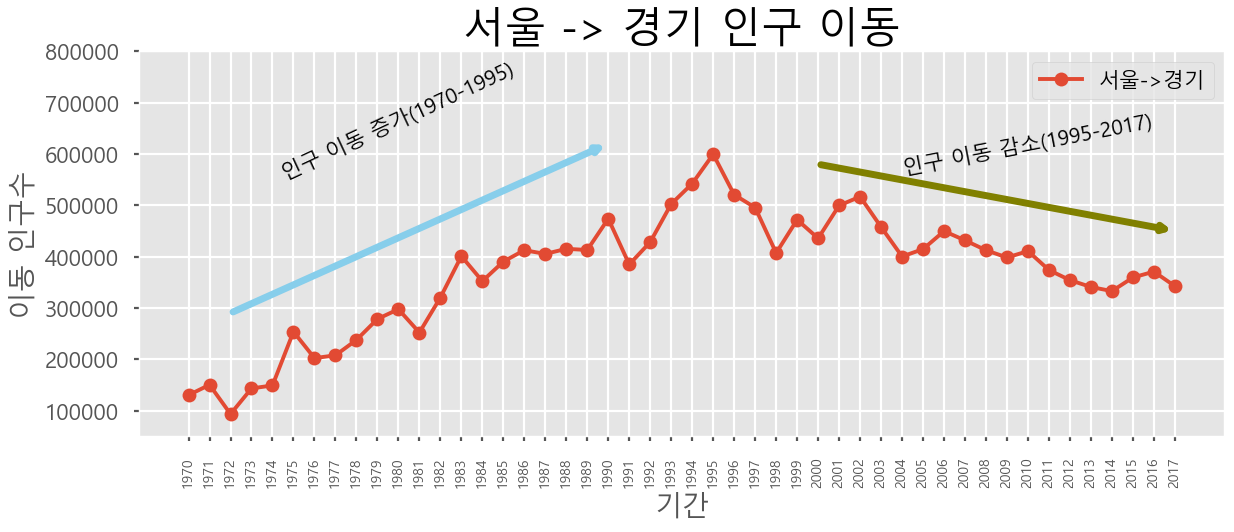

In [49]:
#기존 그래프 그리기
sr_one = df_seoul.loc['경기도']

#스타일 서식 지정
plt.style.use('ggplot')
#그림사이즈 지정
plt.figure(figsize=(14,5))

#x축 눈금라벨 회전하기
plt.xticks(size=10, rotation='vertical')

#x,y축 데이터를  plot 함수에 입력
plt.plot(sr_one.index, sr_one.values, marker='o', markersize=10) #마커표시 추가

plt.title('서울 -> 경기 인구 이동', size=30) #차트제목
plt.xlabel('기간', size=20) #x축 이름
plt.ylabel('이동 인구수',size=20) #y축 이름
plt.legend(labels=['서울->경기'], loc='best', fontsize=15) #범례표시



#y축 범위 지정(최소값,최대값)
plt.ylim(50000,800000)

#주석표시 - 화살표
plt.annotate('',
    xy=(20,620000),  #화살표 머리 부분(끝점)
    xytext=(2,290000),  #화살표의 꼬리 부분(시작점)
    xycoords='data',  #좌표체계
    arrowprops = dict(arrowstyle='->',color='skyblue',lw=5) #화살표 서식
)

plt.annotate('',
             xy=(47,450000),  #화살표 머리 부분(끝점)
             xytext=(30,580000),  #화살표 꼬리 부분(시작점)
             xycoords='data', #좌표 체계
             arrowprops=dict(arrowstyle='->',color='olive',lw=5)  #화살표 서식
)


#주석표시 - 텍스트
plt.annotate('인구 이동 증가(1970-1995)', #텍스트 입력
             xy=(10,550000), #텍스트 위치 기준점
             rotation = 25,  #텍스트 회전 각도
             va='baseline',  #텍스트 상하 정렬
             ha='center',    #텍스트 좌우 정렬
             fontsize=15     #텍스트 크기
             )

plt.annotate('인구 이동 감소(1995-2017)', #텍스트 입력
             xy=(40,560000),              #텍스트 위치 기준점
             rotation = 11,               #텍스트 회전 각도
             va = 'baseline',             #텍스트 상하 정렬
             ha = 'center',               #텍스트 좌우 정렬
             fontsize=15                  #텍스트 크기
             )

plt.show()

- 화면을 분할하여 그래프 여러 개 그리기 : axe() 이용
 - 여러 개의 axe 객체를 만들고 분할된 화면 마다 axe 객체를 하나씩 배정한다
 - axe 객체를 1개만 생성하는 경우 하나의 그래프만 표시 된다
 - 한 화면에서 여러 개의 그래프를 비교하거나 다양한 정보를 동시에 보여줄 때 용이하다
</br>
- figure() 함수를 이용해 그래프 그리는 그림틀(fig)을 만든다
 - figsize 옵션으로 (가로,세로) 그림틀의 크기를 설정한다
 - fig 객체에 add_subplot() 매소드를 적용해 그림틀을 여러 개로 분할한다</br> -> 여기서 나눠진 각부분을 axe 객체라고 한다
-add_subplot() 매소드 인자에는 (행의 크기, 열의 크기, 서브플롯 순서)를 순서대로 입력한다

<ipython-input-50-fc83c5773932>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(sr_one.index,rotation=75)
<ipython-input-50-fc83c5773932>:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(sr_one.index,rotation=75)


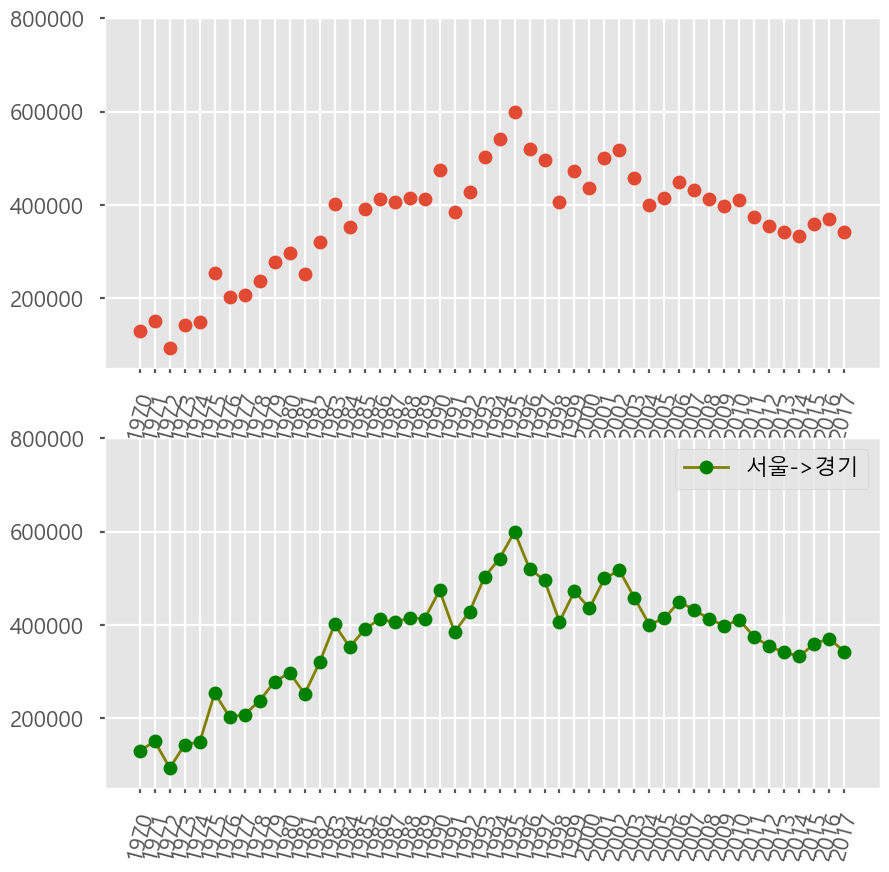

In [50]:
#그래츠 객체 생성(figure에 2개의 서브 플롯 생성)
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)

#axe 객체에 plot 함수로 그래프 출력
ax1.plot(sr_one,'o',markersize=10)      #선 그래프가 아니라 점 그래프로 표현
ax2.plot(sr_one,marker='o',markerfacecolor='green',markersize=10,color='olive',linewidth=2,label='서울->경기')
ax2.legend(loc='best')  #loc: specifies the location of the legend. This case, it will automatically choose the best location

#y축 범위 지정(최소값, 최대값)
ax1.set_ylim(50000,800000)
ax2.set_ylim(50000,800000)

#축 눈금 라벨 지정 및 75도 회전
ax1.set_xticklabels(sr_one.index,rotation=75)
ax2.set_xticklabels(sr_one.index,rotation=75)

plt.show()  #변경사항 저장하고 그래프 출력

<ipython-input-51-2331b0033446>:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(sr_one.index,rotation=75)


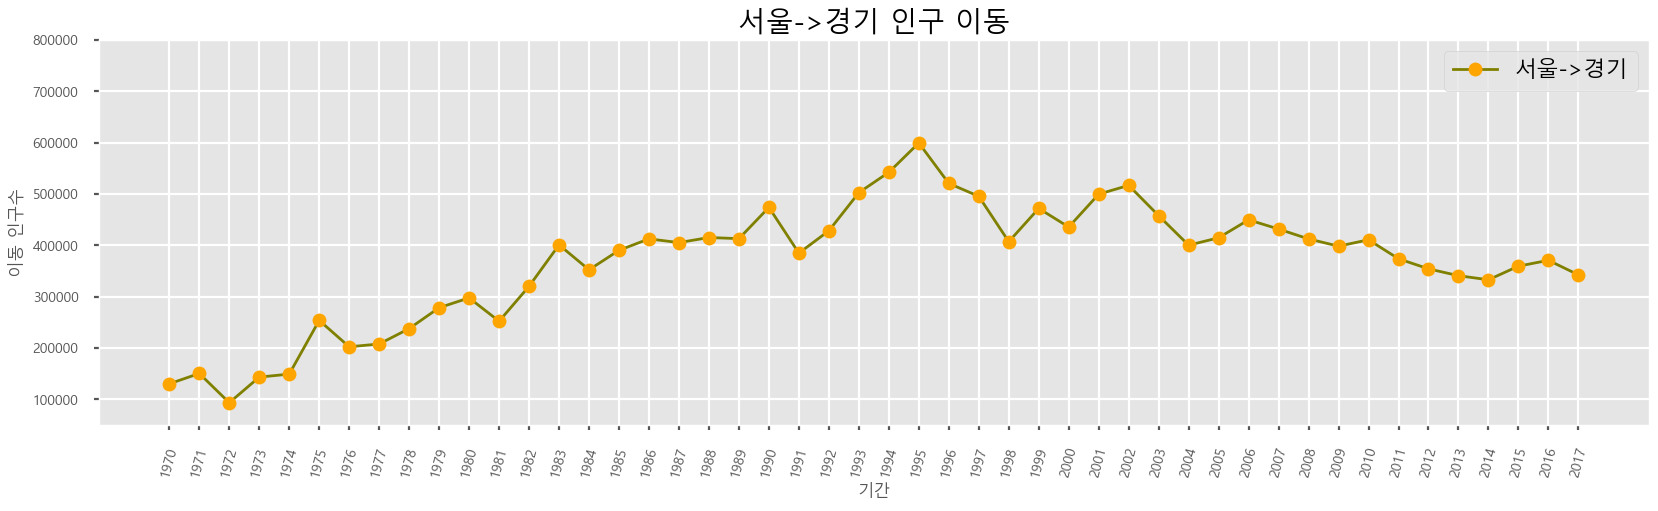

In [51]:
#그래프 객체 생성(figure에 1개 서브 플롯 생성)
fig = plt.figure(figsize=(20,5))
ax = fig.add_subplot(1,1,1)

#axe 객체에 plot 함수로 그래프 출력
ax.plot(sr_one,marker='o',markerfacecolor='orange',markersize=10,color='olive',linewidth=2,label='서울->경기')
ax.legend(loc='best')

#y축 범위 지정(최소값, 최대값)
ax.set_ylim(50000,800000)

#차트 제목 추가
ax.set_title('서울->경기 인구 이동',size=20)

#축 이름 추가
ax.set_xlabel('기간',size=12)
ax.set_ylabel('이동 인구수',size=12)

#축 눈금 라벨 지정 및 75도 회전
ax.set_xticklabels(sr_one.index,rotation=75)

#축 눈금 라벨 크기
ax.tick_params(axis='x',labelsize=10)
ax.tick_params(axis='y',labelsize=10)

plt.show()  #변경사항 저장하고 그래프 출력

<ipython-input-52-9e47640f58f6>:31: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(col_years,rotation=90)


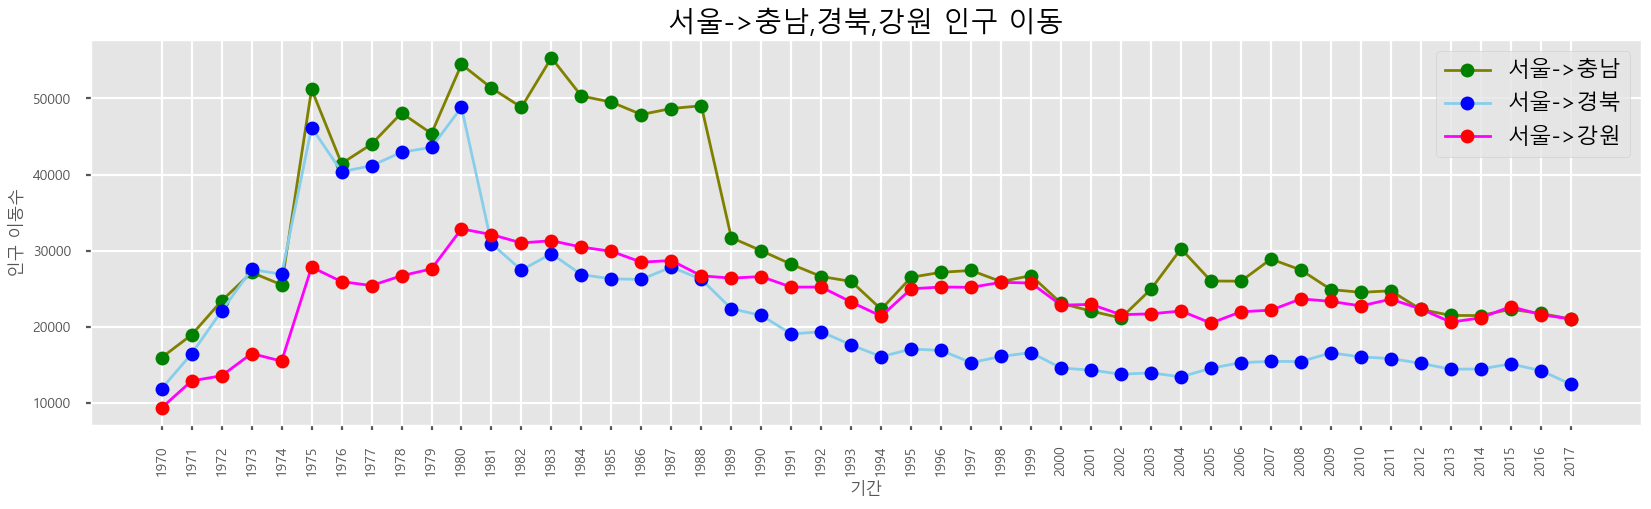

In [52]:
#동일한 그림에 여러 개의 그래프 추가하기

#서울에서 '충청남도','경상북도','강원도'로 이동한 인구 데이터 값만 선택
col_years = list(map(str,range(1970,2018)))
df_3 = df_seoul.loc[['충청남도','경상북도','강원도'],col_years]    # 해당값 추출하여 저장


#스타일 서식 지정
plt.style.use('ggplot')

#그래프 객체 생성(figure에 1개의 서브 플롯 생성)
fig = plt.figure(figsize=(20,5))
ax = fig.add_subplot(1,1,1)

#axe 객체에 plot 함수로 그래프 출력
ax.plot(col_years,df_3.loc['충청남도',:],marker='o',markerfacecolor='green',markersize=10,color='olive',linewidth=2,label='서울->충남')
ax.plot(col_years,df_3.loc['경상북도',:],marker='o',markerfacecolor='blue',markersize=10,color='skyblue',linewidth=2,label='서울->경북')
ax.plot(col_years,df_3.loc['강원도',:],marker='o',markerfacecolor='red',markersize=10,color='magenta',linewidth=2,label='서울->강원')

#범례 표시
ax.legend(loc='best')

#차트 제목 추가
ax.set_title('서울->충남,경북,강원 인구 이동',size=20)

#축 이름 추가
ax.set_xlabel('기간',size=12)
ax.set_ylabel('인구 이동수',size=12)

#축 눈금 라벨 지정 및 90도 회전
ax.set_xticklabels(col_years,rotation=90)

#축 눈금 라벨 크기
ax.tick_params(axis='x',labelsize=10)
ax.tick_params(axis='y',labelsize=10)

plt.show()

<ipython-input-53-bbda31a14ff8>:36: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(col_years,rotation=90)
<ipython-input-53-bbda31a14ff8>:37: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(col_years,rotation=90)
<ipython-input-53-bbda31a14ff8>:38: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax3.set_xticklabels(col_years,rotation=90)
<ipython-input-53-bbda31a14ff8>:39: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax4.set_xticklabels(col_years,rotation=90)


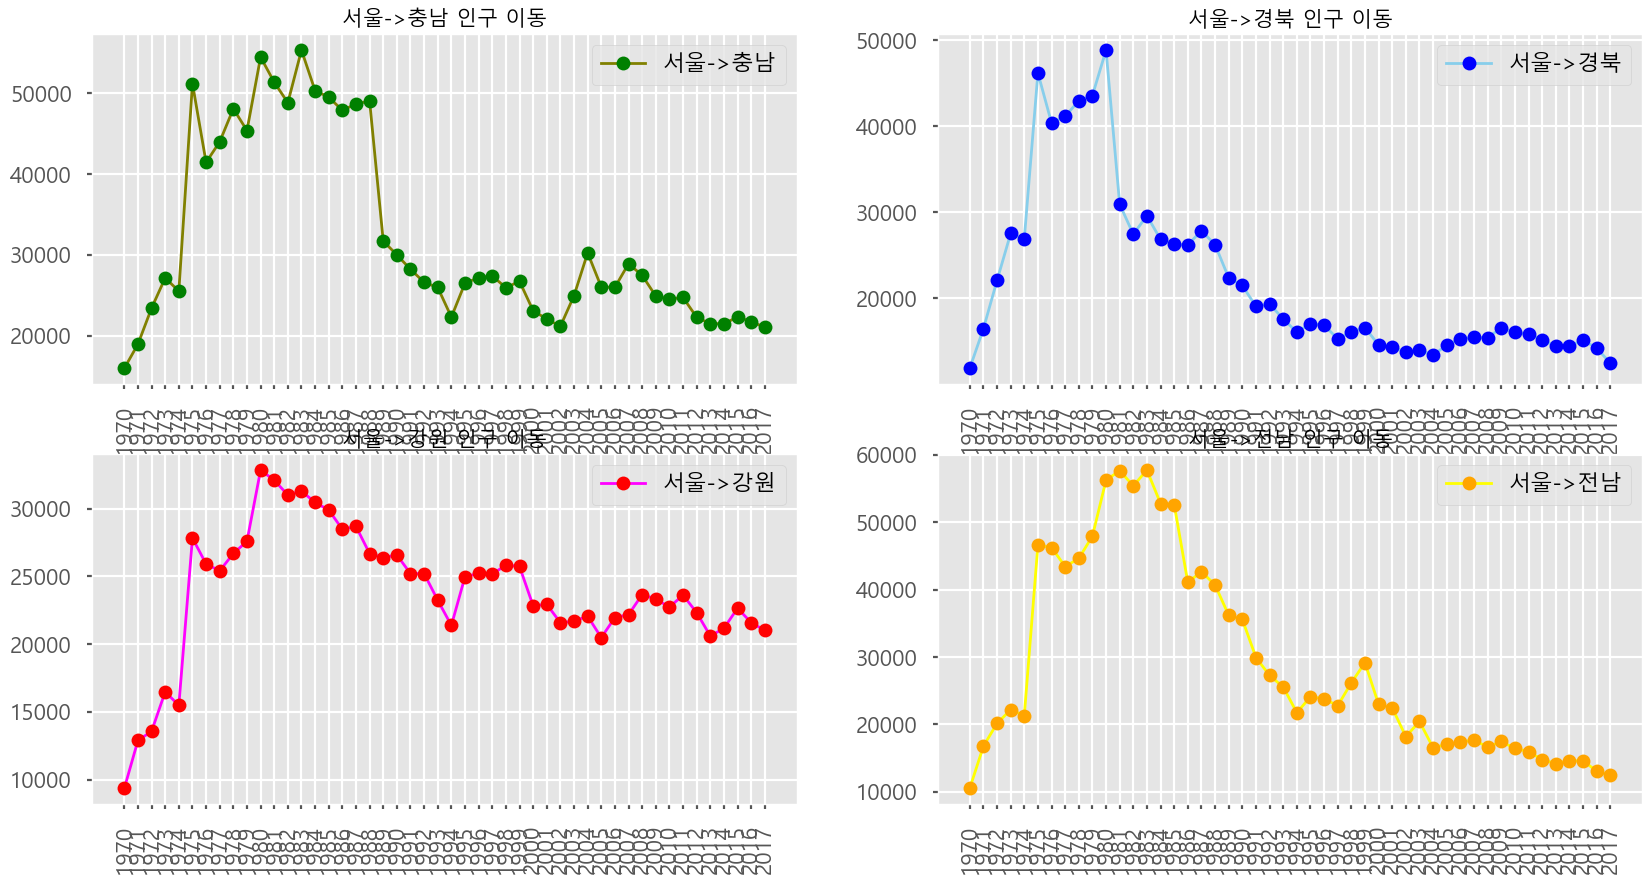

In [53]:
#서울특별시에서 4개의 지역으로 이동한 인구 변화 그래프 그려보기

#서울에서 '충청남도','경상북도','강원도','전라남도'로 이동한 인구 데이터 값만 선택
col_years = list(map(str,range(1970,2018)))
df_4 = df_seoul.loc[['충청남도','경상북도','강원도','전라남도'],col_years]

#스타일 서식 지정
plt.style.use('ggplot')

#그래프 객체 생성(figure에 1개의 서브 플롯 생성)
fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)

#axe 객체에 plot 함수로 그래프 출력
ax1.plot(col_years,df_4.loc['충청남도',:],marker='o',markerfacecolor='green',markersize=10,color='olive',linewidth=2,label='서울->충남')
ax2.plot(col_years,df_4.loc['경상북도',:],marker='o',markerfacecolor='blue',markersize=10,color='skyblue',linewidth=2,label='서울->경북')
ax3.plot(col_years,df_4.loc['강원도',:],marker='o',markerfacecolor='red',markersize=10,color='magenta',linewidth=2,label='서울->강원')
ax4.plot(col_years,df_4.loc['전라남도',:],marker='o',markerfacecolor='orange',markersize=10,color='yellow',linewidth=2,label='서울->전남')

#범례표시
ax1.legend(loc='best')
ax2.legend(loc='best')
ax3.legend(loc='best')
ax4.legend(loc='best')

#차트 제목 추가
ax1.set_title('서울->충남 인구 이동',size=15)
ax2.set_title('서울->경북 인구 이동',size=15)
ax3.set_title('서울->강원 인구 이동',size=15)
ax4.set_title('서울->전남 인구 이동',size=15)

#축 눈금 라벨 지정 및 90도 회전
ax1.set_xticklabels(col_years,rotation=90)
ax2.set_xticklabels(col_years,rotation=90)
ax3.set_xticklabels(col_years,rotation=90)
ax4.set_xticklabels(col_years,rotation=90)

plt.show()

- Matplotlib에서 사용할 수 있는 색의 종류

In [54]:
#라이브러리 불러오기
import matplotlib

#컬러 정보를 담을 빈 딕셔너리 생성
colors={}

#컬러 이름과 헥사코드 확인하여 딕셔너리에 입력
for name, hex in matplotlib.colors.cnames.items():
  colors[name] = hex

#딕셔너리 출력
print(colors)

{'aliceblue': '#F0F8FF', 'antiquewhite': '#FAEBD7', 'aqua': '#00FFFF', 'aquamarine': '#7FFFD4', 'azure': '#F0FFFF', 'beige': '#F5F5DC', 'bisque': '#FFE4C4', 'black': '#000000', 'blanchedalmond': '#FFEBCD', 'blue': '#0000FF', 'blueviolet': '#8A2BE2', 'brown': '#A52A2A', 'burlywood': '#DEB887', 'cadetblue': '#5F9EA0', 'chartreuse': '#7FFF00', 'chocolate': '#D2691E', 'coral': '#FF7F50', 'cornflowerblue': '#6495ED', 'cornsilk': '#FFF8DC', 'crimson': '#DC143C', 'cyan': '#00FFFF', 'darkblue': '#00008B', 'darkcyan': '#008B8B', 'darkgoldenrod': '#B8860B', 'darkgray': '#A9A9A9', 'darkgreen': '#006400', 'darkgrey': '#A9A9A9', 'darkkhaki': '#BDB76B', 'darkmagenta': '#8B008B', 'darkolivegreen': '#556B2F', 'darkorange': '#FF8C00', 'darkorchid': '#9932CC', 'darkred': '#8B0000', 'darksalmon': '#E9967A', 'darkseagreen': '#8FBC8F', 'darkslateblue': '#483D8B', 'darkslategray': '#2F4F4F', 'darkslategrey': '#2F4F4F', 'darkturquoise': '#00CED1', 'darkviolet': '#9400D3', 'deeppink': '#FF1493', 'deepskyblue'

[02] 면적 그래프
- 선그래프와 x축 사이의 공간에 색이 입혀진다
- 투명도(alpha)는 기본값=0.5로 투과되어 보인다
- plot 매소드 안에 kind='area' 옵션 추가로 그릴 수 있다
- 그래프 누적
 - stacked=True (기본값) </br> 각 열의 선 그래프를 다른 열의 선 그래프 위로 쌓아 올리는 방식으로 표현된다
 - stacked = False </br> 각 열의 선의 그래프들이 누적되 지않고 서로 겹쳐지도록 표시된다


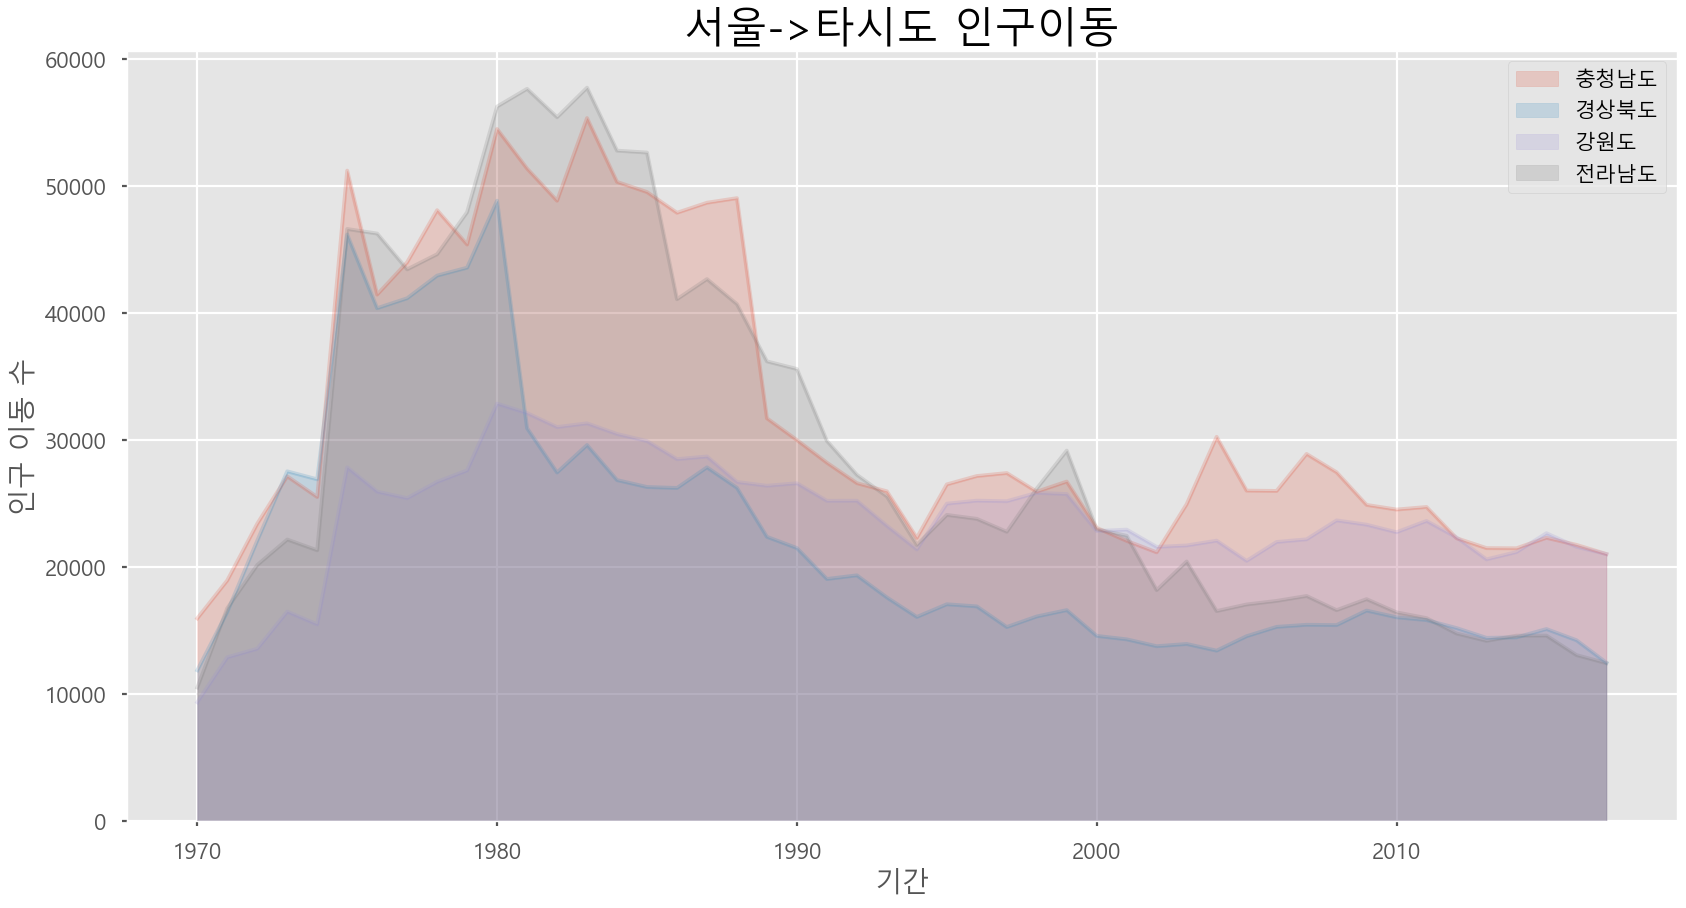

In [55]:
#서울에서 다른 지역으로 이동한 데이터만 추출하여 정리
mask = (df['전출지별']=='서울특별시') & (df['전입지별'] != '서울특별시')
df_seoul = df[mask]
df_seoul = df_seoul.drop(['전출지별'],axis=1)
df_seoul.rename({'전입지별':'전입지'},axis=1,inplace=True)
df_seoul.set_index('전입지',inplace=True)

#서울에서 '충청남도','경상북도','강원도','전라남도'로 이동한 인구 데이터 값만 선택
col_years = list(map(str,range(1970,2018)))
df_4 = df_seoul.loc[['충청남도','경상북도','강원도','전라남도'],col_years]
df_4 = df_4.transpose()

#스타일 서식 지정
plt.style.use('ggplot')

#데이터프레임의 인덱스 정수형으로 변경(x축 눈금 라벨 표시)
df_4.plot(kind='area',stacked=False,alpha=0.2,figsize=(20,10))

plt.title('서울->타시도 인구이동',size=30)
plt.ylabel('인구 이동 수',size=20)
plt.xlabel('기간',size=20)
plt.legend(loc='best',fontsize=15)

plt.show()

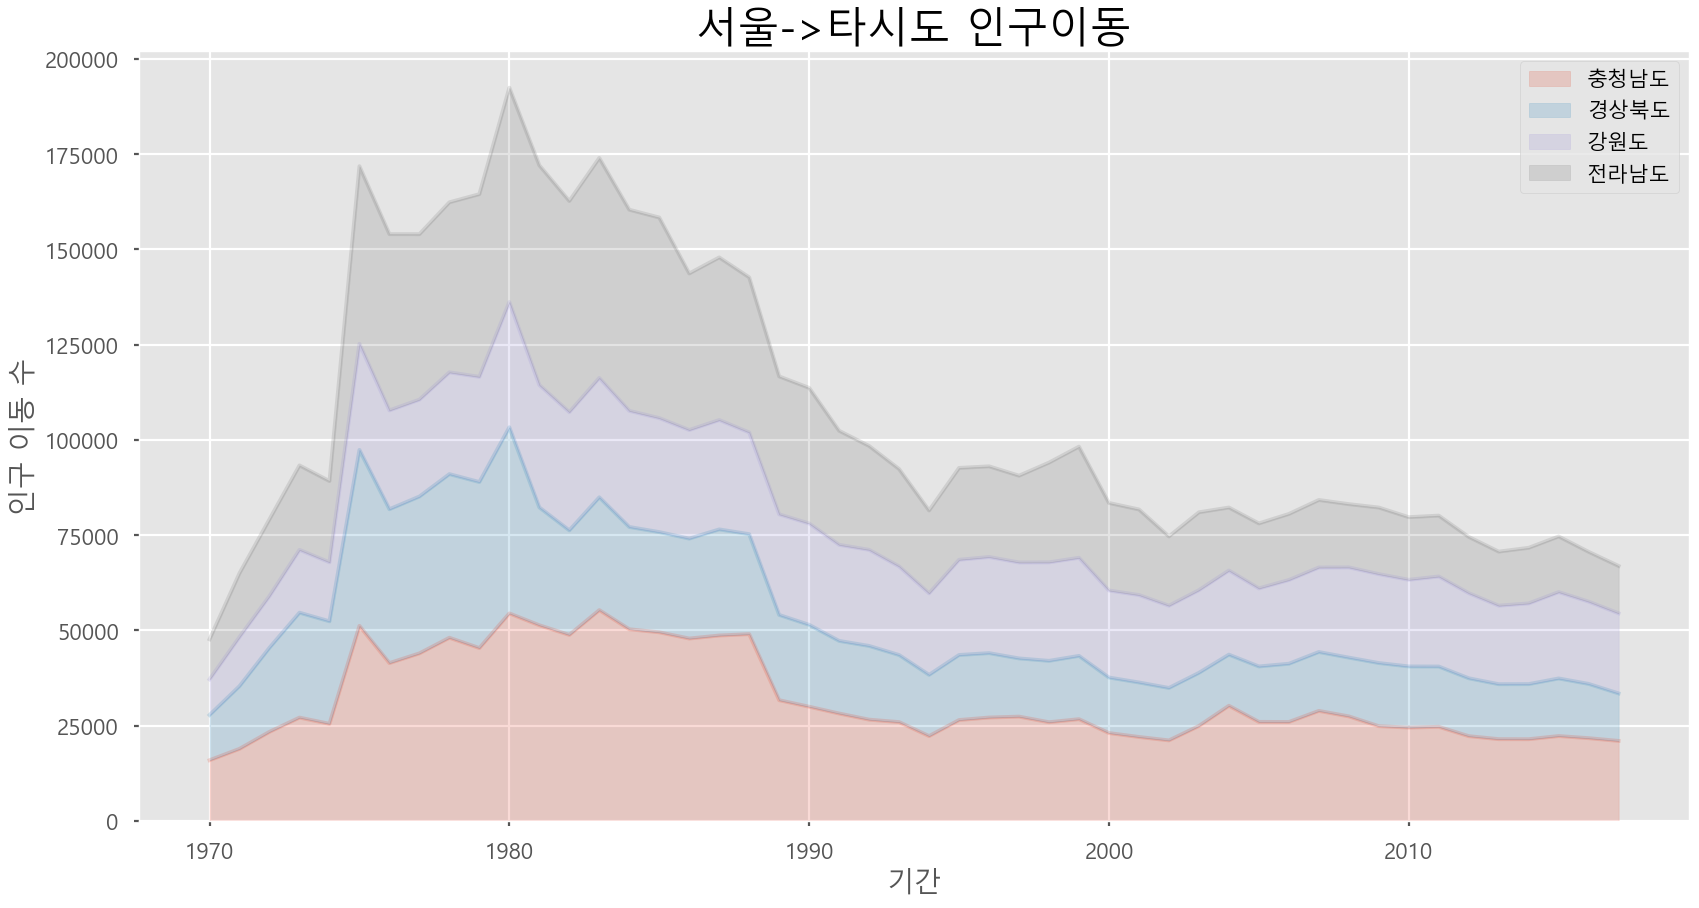

In [56]:
#stacked = True 로 바꾸기
#데이터프레임의 인덱스를 정수형으로 변경(x축 눈금 라벨 표시)
df_4.index = df_4.index.map(int)

#면적 그래프 그리기
df_4.plot(kind='area',stacked=True,alpha=0.2,figsize=(20,10))

plt.title('서울->타시도 인구이동',size=30)
plt.ylabel('인구 이동 수',size=20)
plt.xlabel('기간',size=20)
plt.legend(loc='best',fontsize=15)


plt.show()

<class 'matplotlib.axes._axes.Axes'>


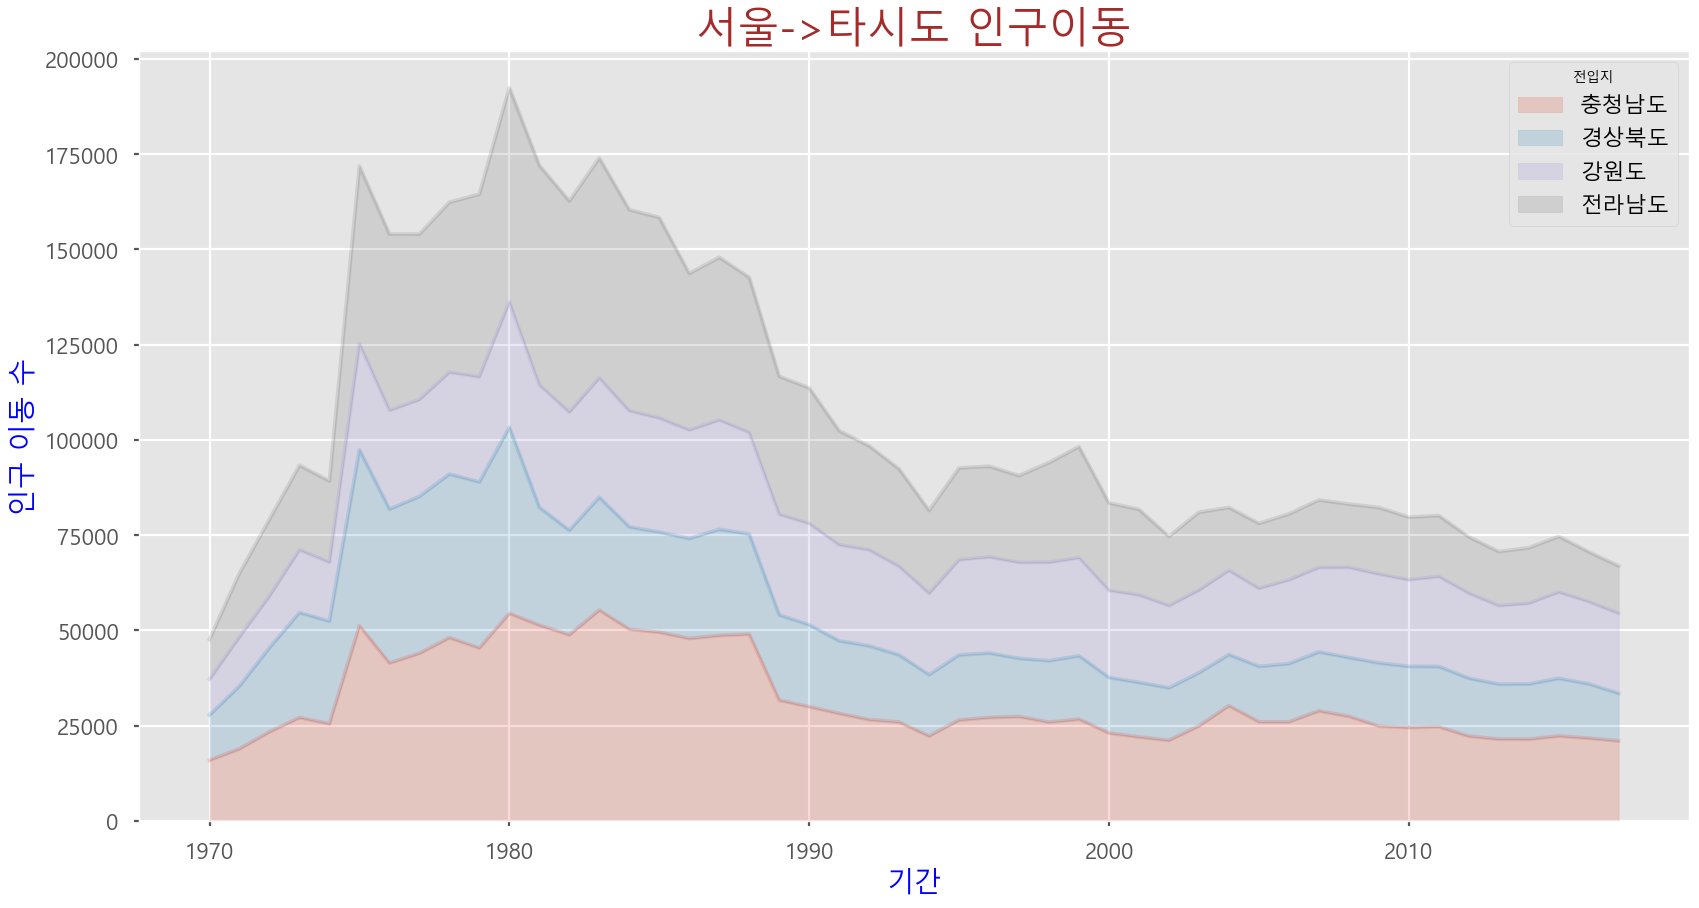

In [57]:
#axe 객체(ax)의 세부적인 요소를 설정할 수 있음

#데이터프레임의 인덱스를 정수형으로 변경(x축 눈금 라벨 표시)
df_4.index = df_4.index.map(int)

#면적 그래프 axe 객체 생성
ax = df_4.plot(kind='area',stacked=True,alpha=0.2,figsize=(20,10))
print(type(ax))


#axe 객체 설정 변경
ax.set_title('서울->타시도 인구이동',size=30,color='brown',weight='bold')
ax.set_ylabel('인구 이동 수',size=20,color='blue')
ax.set_xlabel('기간',size=20,color='blue')
ax1.legend(loc='best',fontsize=15)


plt.show()

[03] 막대 그래프
 - 막대 높이의 상대적 길이 차이를 통해 값이 크고 작음을 설명한다
 -세로형 막대 그래프
  - 시계열 데이터를 표현하는데 적합하다
  - plot() 매소드에 kind='bar' 옵션을 입력
 - 가로형 막대 그래프
  - 각 변수 사이 값의 크기 차이를 설명하는데 적합하다
  - plot() 매소드에 kind='barh' 옵션을 입력

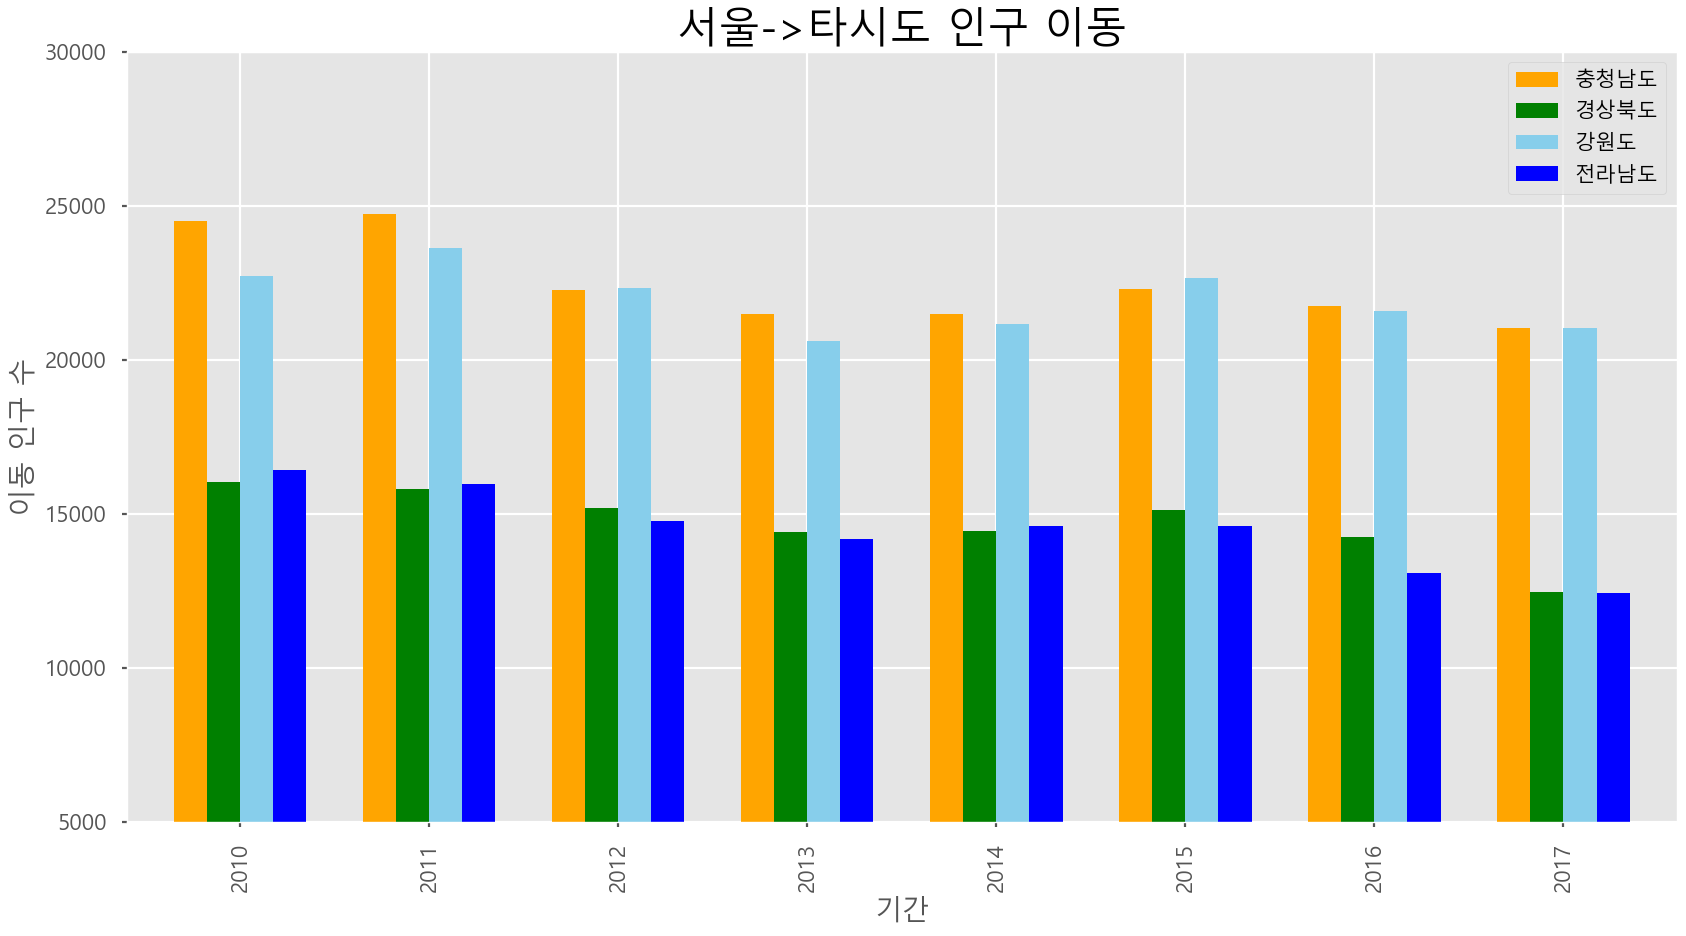

In [58]:
#서울에서 '충청남도','경상북도','강원도','전라남도'로 이동한 인구 데이터 값만 선택
col_years = list(map(str,range(2010,2018)))
df_4 = df_seoul.loc[['충청남도','경상북도','강원도','전라남도'],col_years]
df_4 = df_4.transpose()

#스타일 서식 지정
plt.style.use('ggplot')

#데이터프레임의 인덱스를 정수형으로 변경(x축 눈금 라벨 표시)
df_4.index = df_4.index.map(int)

#막대 그래프 그리기
df_4.plot(kind='bar',figsize=(20,10), width=0.7, color=['orange','green','skyblue','blue'])

plt.title('서울->타시도 인구 이동',size=30)
plt.ylabel('이동 인구 수',size=20)
plt.xlabel('기간',size=20)
plt.ylim(5000,30000)
plt.legend(loc='best',fontsize=15)

plt.show()

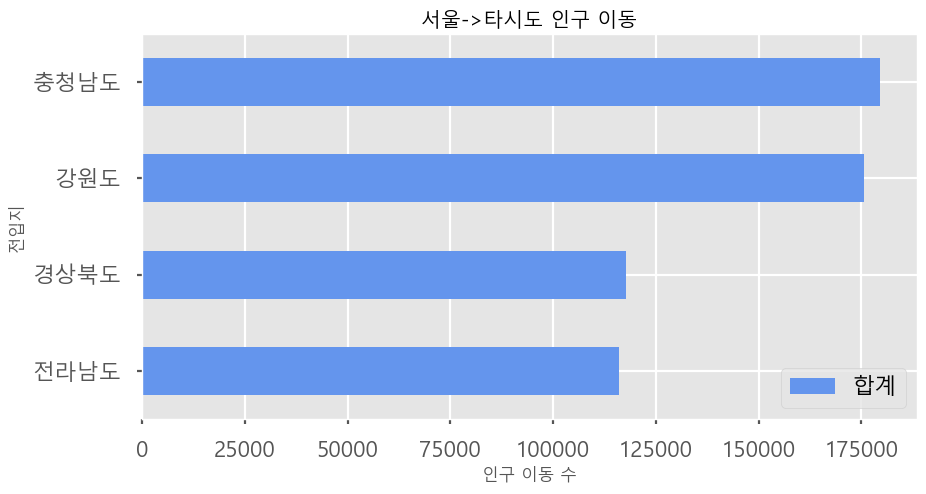

In [59]:
#서울에서 '충청남도','경상북도','강원도','전라남도'로 이동한 인구 데이터 값만 선택
col_years = list(map(str,range(2010,2018)))
df_4 = df_seoul.loc[['충청남도','경상북도','강원도','전라남도'],col_years]


#2010-2017년 이동 인구 수를 합계하영 새로운 열로 추가
df_4['합계'] = df_4.sum(axis=1)

#가장 큰 값부터 정렬
df_total = df_4[['합계']].sort_values(by='합계',ascending=True)

#스타일 서식 지정
plt.style.use('ggplot')

#수평 막대 그래프 그리기
df_total.plot(kind='barh',color='cornflowerblue',width=0.5,figsize=(10,5))

plt.title('서울->타시도 인구 이동')
plt.ylabel('전입지')
plt.xlabel('인구 이동 수')

plt.show()

- 보조 축 활용하기(2축 그래프 그리기)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<ipython-input-60-90ec415d36df>:24: FutureWarning: convert_float is deprecated and will be removed in a future version.
  df = pd.read_excel('/content/drive/MyDrive/남북한발전전력량.xlsx', convert_float=True)


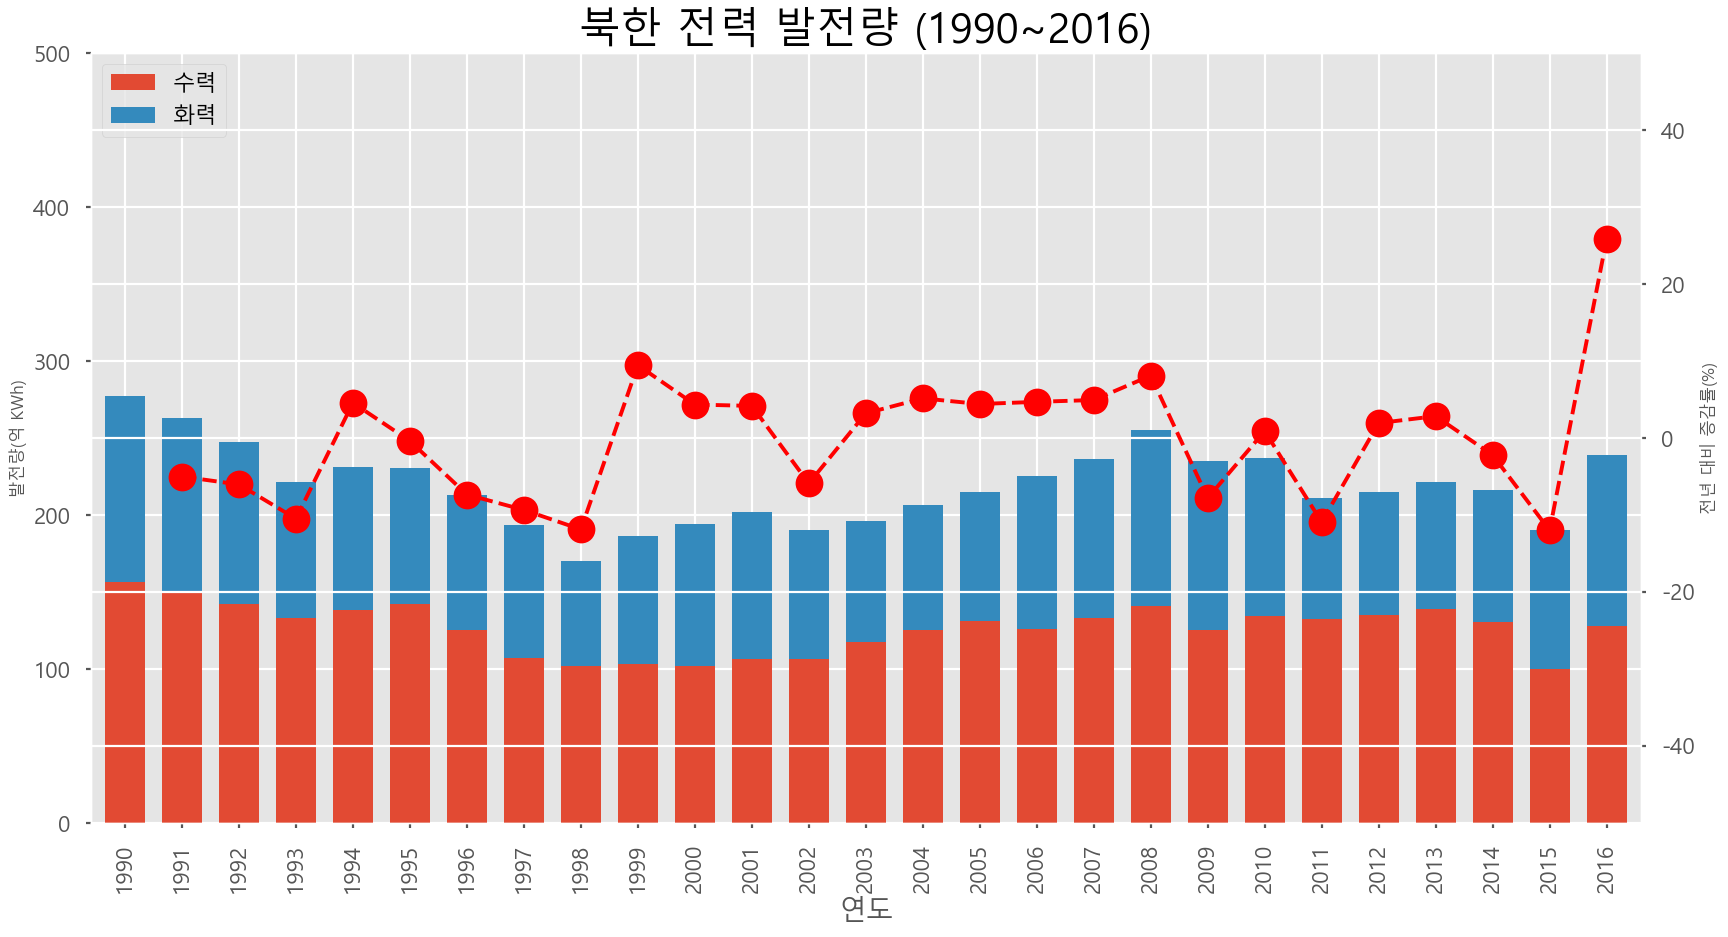

In [60]:
#라이브러리 불러오기
import pandas as pd
import matplotlib.pyplot as plt

#matploylib 한글 폰트 오류 문제 해결
# apt-get : 패키지 설치 명령어
# -qq : 에러외의 메세지 숨기는 옵션키
!apt-get -qq install fonts-nanum

fe = fm.FontEntry(
    fname=r'/content/drive/MyDrive/malgun.ttf', # ttf 파일이 저장되어 있는 경로
    name='malgunGothic')                        # 이 폰트의 원하는 이름 설정
fm.fontManager.ttflist.insert(0, fe)              # Matplotlib에 폰트 추가
plt.rcParams.update({'font.size': 18, 'font.family': 'malgunGothic'})


plt.style.use('ggplot')
plt.rcParams['axes.unicode_minus']=False    #마이너스 부호 출석 설정


#Excel 데이터를 데이터프레임으로 변환
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_excel('/content/drive/MyDrive/남북한발전전력량.xlsx', convert_float=True)
df = df.loc[5:9]
df.drop('전력량 (억㎾h)', axis='columns',inplace=True)
df.set_index('발전 전력별',inplace=True)
df=df.T

#증감률(변동률) 계산
df = df.rename(columns={'합계':'총발전량'})
df['총발전량-1년'] = df['총발전량'].shift(1)
df['증감률'] = ((df['총발전량']/df['총발전량-1년'])-1)*100

#2축 그래프 그리기
ax1 = df[['수력','화력']].plot(kind='bar',figsize=(20,10),width=0.7,stacked=True)
ax2 = ax1.twinx()
ax2.plot(df.index,df.증감률,ls='--',marker='o',markersize=20,color='red',label='전년대비 증감률(%)')

ax1.set_ylim(0,500)
ax2.set_ylim(-50,50)

ax1.set_xlabel('연도',size=20)
ax1.set_ylabel('발전량(억 KWh)')
ax2.set_ylabel('전년 대비 증감률(%)')

plt.title('북한 전력 발전량 (1990~2016)',size=30)
ax1.legend(loc='upper left')

plt.show()

[04] 히스토그램
 - 단변수 데이터의 빈도수를 그래프로 표현함
 - 구간을 나누는 간격의 크기에 따라 빈도가 달라지고 히스토그램 모양이 변한다

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


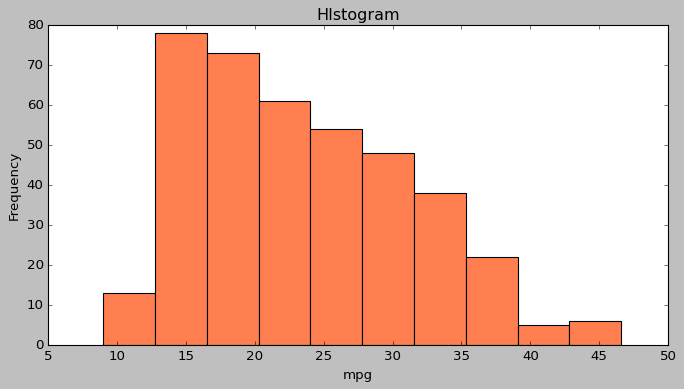

In [61]:
#라이브러리 불러오기
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('classic')  #스타일 서식 저장

#read_csv() 함수로 df 생성
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/auto-mpg.csv', header=None)

#열 이름 저장
df.columns = ['mpg','cylinders','displacemment','horsepower','weight','acceleration','model year','origin','name']

#연비(mpg) 열에 대한 히스토그램 그리기
df['mpg'].plot(kind="hist",bins=10,color='coral',figsize=(10,5))

#그래프 꾸미기
plt.title('HIstogram')
plt.xlabel('mpg')
plt.show()

[06] 산점도
 - 서로 다른 두 연속형 변수 사이의 관계를 나타낸다
 - 일반적으로 정수형(int64)와 실수형(float64)이다
 -plot() 메소드에 kind='scatter' 옵션을 사용한다

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


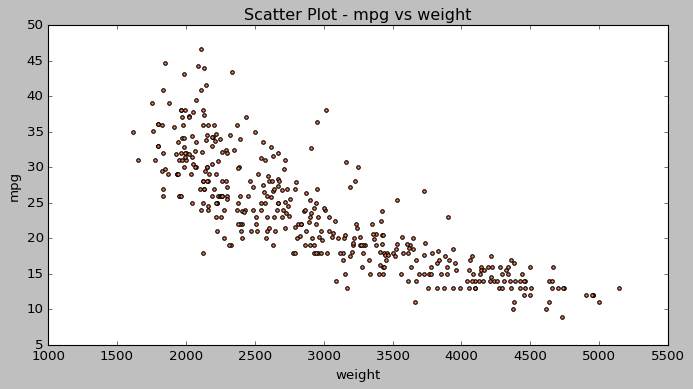

In [62]:
#라이브러리 불러오기
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('classic')  #스타일 서식 저장

#read_csv() 함수로 df 생성
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/auto-mpg.csv', header=None)

#열 이름 저장
df.columns = ['mpg','cylinders','displacemment','horsepower','weight','acceleration','model year','origin','name']

#연비(mpg)와 차중(weight) 열에 대한 산점도 그리기
df.plot(kind='scatter',x = 'weight', y = 'mpg', c='coral',s = 10, figsize=(10,5))
plt.title('Scatter Plot - mpg vs weight')
plt.show()

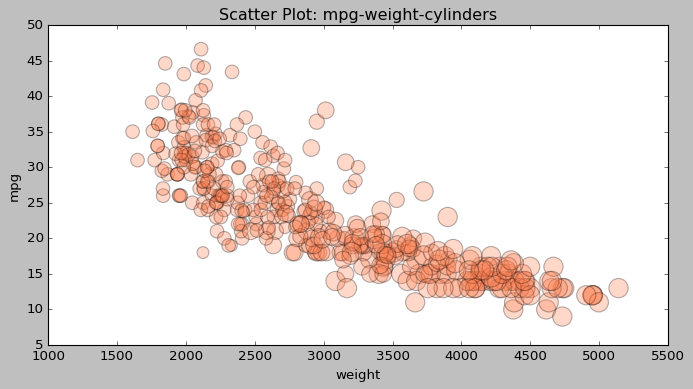

In [63]:
#3번째 변수를 추가하여 점의 크기 또는 색상으로 표시 가능하다

#cylinders 개수의 상대적 비율을 계산하여 시리즈 생성
cylinders_size = df.cylinders/df.cylinders.max()*300

#3개의 변수로 산점도 그리기
df.plot(kind='scatter',x='weight',y='mpg',c='coral',figsize=(10,5), s=cylinders_size,alpha=0.3)
plt.title('Scatter Plot: mpg-weight-cylinders')
plt.show()

- 그래프 그림 파일로 저장
 - savefig() 함수에 저장하려는 파일의 이름과 파일 경로를 설정하다
 - 색상을 정하는 컬러맵(cmap)으로 'viridis' 옵션을 사용한다

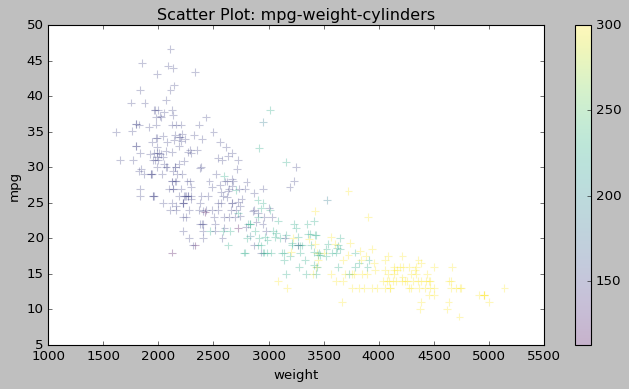

In [64]:
#cylinders 개수의 상대적 비율을 계산하여 시리즈 생성
cylinders_size = df.cylinders/df.cylinders.max()*300

#3개의 변수로 산점도 그리기
df.plot(kind='scatter',x='weight',y='mpg',marker='+',figsize=(10,5), cmap='viridis', c=cylinders_size,s =50, alpha=0.3)
plt.title('Scatter Plot: mpg-weight-cylinders')

plt.savefig('./scatter.png')
plt.savefig('./scatter_transparent.png',transparent=True)

plt.show()

[06] 파이 차트
 - 원을 파이조각 처럼 나누어서 표현하며 조각의 크기는 해당 변수가 속한 데이터의 값 크기에 비례한다.
 - plot() 메소드에 kind='pie' 옵션을 사용하여 그린다

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
           mpg  cylinders  displacemment    weight  acceleration  model year  \
origin                                                                         
1       5000.8       1556        61229.5  837121.0        3743.4       18827   
2       1952.4        291         7640.0  169631.0        1175.1        5307   
3       2405.6        324         8114.0  175477.0        1277.6        6118   

        count  
origin         
1         249  
2          70  
3          79  


<ipython-input-65-28ab04a0c297>:17: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_origin = df.groupby('origin').sum()   #origin 열을 기준으로 그룹화, 합계 연산


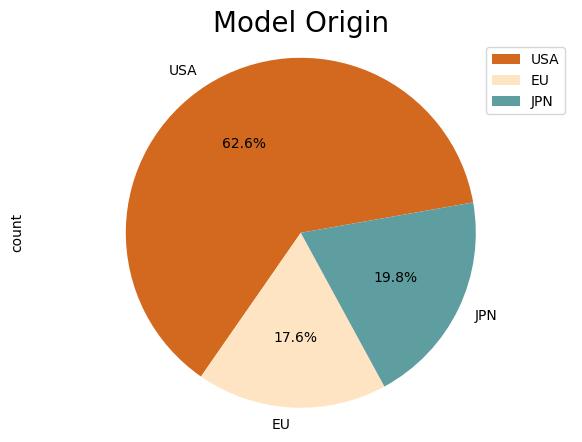

In [65]:
#라이브러리 불러오기
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('default')   #스타일 서식 저장

#read.csv() 함수로 df 생성
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/auto-mpg.csv', header=None)

#열 이름 저장
df.columns = ['mpg','cylinders','displacemment','horsepower','weight','acceleration','model year','origin','name']

#데이터 개수 카운트를 위해 값 1을 가진 열 추가
df['count'] = 1
df_origin = df.groupby('origin').sum()   #origin 열을 기준으로 그룹화, 합계 연산
print(df_origin.head())  #그룹 연산 결과 출력

#제조국가(origin) 값을 실제 지역명으로 변경
df_origin.index = ['USA','EU','JPN']

#제조국가(origin) 열에 대한 파이 차트 그리기 - count 열 데이터 사용
df_origin['count'].plot(kind='pie',
                        figsize=(7,5),
                        autopct='%1.1f%%',   #퍼센트 % 표시
                        startangle=10,     #파이 조각을 나누는 시작점(각도 표시)
                        colors=['chocolate','bisque','cadetblue'])   #색상 리스트

plt.title('Model Origin',size=20)
plt.axis('equal')   #파이 차트의 비율을 같게(원에 가깝게) 조정
plt.legend(labels=df_origin.index,loc='upper right')   #범례 표시
plt.show()

[07] 박스 플롯
 - 범주형 데이터의 분포를 파악하는데 적합하다
 - 5개의 통계 지표(최소값,1분위값,중간값,3분위값,최대값)을 제공한다

<ipython-input-66-fbcb90165069>:18: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-poster')   #스타일 서식 지정


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


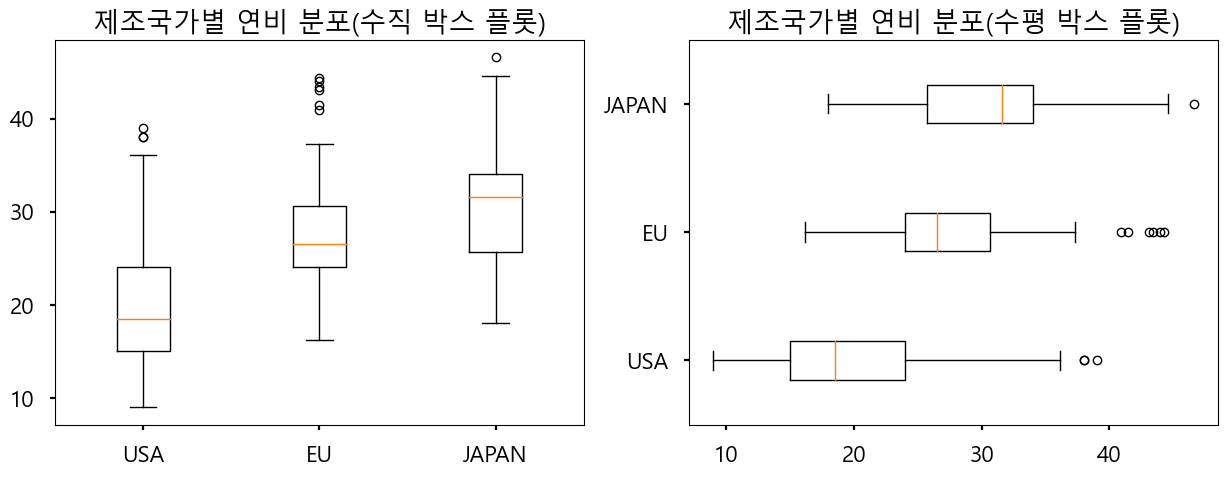

In [66]:
#라이브러리 불러오기
import pandas as pd
import matplotlib.pyplot as plt

#matplotlib 한글 폰트 오류 문제 해결
import matplotlib.font_manager as fm

# apt-get : 패키지 설치 명령어
# -qq : 에러외의 메세지 숨기는 옵션키
!apt-get -qq install fonts-nanum

fe = fm.FontEntry(
    fname=r'/content/drive/MyDrive/malgun.ttf', # ttf 파일이 저장되어 있는 경로
    name='malgunGothic')                        # 이 폰트의 원하는 이름 설정
fm.fontManager.ttflist.insert(0, fe)              # Matplotlib에 폰트 추가
plt.rcParams.update({'font.size': 18, 'font.family': 'malgunGothic'})

plt.style.use('seaborn-poster')   #스타일 서식 지정
plt.rcParams['axes.unicode_minus'] = False  #마이너스 부호 출력 설정


#read_csv() 함수로 df 생성
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/auto-mpg.csv', header=None)

#열이름 지정
df.columns = ['mpg','cylinders','displacemment','horsepower','weight','acceleration','model year','origin','name']

#그래프 객체 생성(figure에 2개의 서브 플롯 생성)
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

#axe 객체에 boxplot 메소드로 그래프 출력
ax1.boxplot(x=[df[df['origin']==1]['mpg'],
               df[df['origin']==2]['mpg'],
               df[df['origin']==3]['mpg']],
            labels=['USA','EU','JAPAN']
            )

ax2.boxplot(x=[df[df['origin']==1]['mpg'],
               df[df['origin']==2]['mpg'],
               df[df['origin']==3]['mpg']],
            labels=['USA','EU','JAPAN'],
            vert=False
            )

ax1.set_title('제조국가별 연비 분포(수직 박스 플롯)')
ax2.set_title('제조국가별 연비 분포(수평 박스 플롯)')

plt.show()